<a href="https://colab.research.google.com/github/nitingarg2015/EVA8/blob/master/Assignment%207/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision
from torch.optim.lr_scheduler import StepLR # Import your choice of scheduler here
import albumentations as A
from albumentations.pytorch import ToTensorV2


In [ ]:
pip install grad-cam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 29.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38261 sha256=edd8e6b5c8c55e184eea6f4593a4e27acf216d5255a496a2ae280994634b40d1
  Stored in directory: /root/.cache/pip/wheels/53/02/43/1f75726b5c28459596067ad91e36951463c01273eef661f09f
Successfully built grad-cam


## Clone model, utility and other files from Git repository

In [ ]:
!git clone  https://github.com/nitingarg2015/Refs.git

Cloning into 'Refs'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 42 (delta 23), reused 30 (delta 11), pack-reused 0
Unpacking objects: 100% (42/42), 11.44 KiB | 1.14 MiB/s, done.


## import and load Resnet18 model

In [ ]:

#import model
from Refs.models import resnet

# import function to load CIFAR dataset, train and test models and other utilities
from Refs.utils import gradcam, utils, CIFARdata


In [ ]:
model = resnet.ResNet18()
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

In [ ]:
import torch
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
summary(model.to(device), input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

## Load CIFAR train and test data loaders

In [ ]:
#set batch size
batch_size = 32

#load training dataset
classes, train_loader = CIFARdata.load_CIFAR(train = True, batch_size = batch_size)
#load test dataset
_, test_loader = CIFARdata.load_CIFAR(train = False, batch_size = batch_size)

len(train_loader), len(test_loader)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /root/data/cifar10/cifar-10-python.tar.gz to /root/data/cifar10
Files already downloaded and verified


(1563, 313)

## View sample images

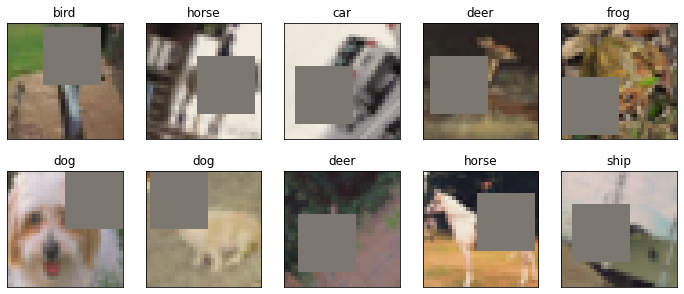

In [ ]:
# get some random training images
from Refs.utils import utils
import matplotlib.pyplot as plt
images, labels = next(iter(train_loader))

no_images = 10

figure = plt.figure(figsize=(12, 5))

for index in range(1, no_images + 1):
    plt.subplot(2, 5, index)
    utils.imshow(images[index - 1])
    plt.tick_params(left=False, right=False, labelleft=False,
                    labelbottom=False, bottom=False)
    title = str(classes[labels[index - 1]])
    plt.title(title)


## Train model for 20 Epochs with CIFAR train data loader

In [ ]:
from Refs import main
#model, train_losses, train_acc_all, test_losses, test_acc_all = main.train_model(model, train_loader, test_loader, device, epochs=20)

## Save and load model for future use

In [ ]:
#torch.save(model.state_dict(), 'resnetmodel.pt')
from google.colab import drive
drive.mount('/content/drive')
#path = "/content/drive/MyDrive/EVA8/ass7/resnetmodel.pt"
path = "/content/drive/MyDrive/resnetmodel.pt"
#torch.save(model.state_dict(), path)

Mounted at /content/drive


In [ ]:
# Model class must be defined somewhere
pretrained_weights = torch.load(path, map_location='cpu')
model.load_state_dict(pretrained_weights)


<All keys matched successfully>

## Test Accuracy

In [ ]:
from Refs import main

main.test(model, device, test_loader)


Test set: Average loss: 0.0167, Accuracy: 8194/10000 (81.94%)



(0.016661387576162815, 81.94)

## Retrieve data for misclassified images

In [ ]:
from Refs.utils import utils

data_images, pred_labels, target_labels = utils.get_mis_classified_byloader(model, device, test_loader)
print(len(data_images), len(pred_labels), len(target_labels))

1806 1806 1806


## Plot mis classified images

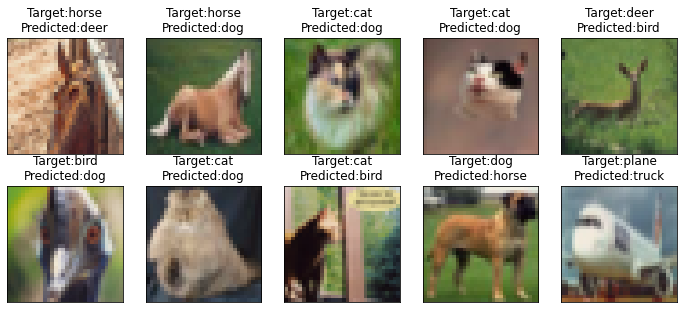

In [ ]:
import matplotlib.pyplot as plt
from Refs.utils import utils
        
utils.plot_misclassified(data_images, target_labels, pred_labels, classes, no_images= 10)

## Gradcam

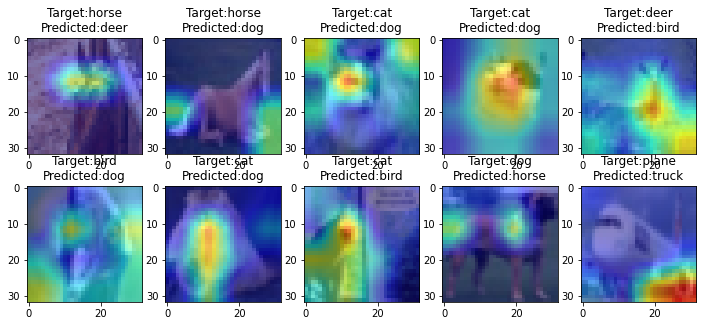

In [ ]:
from Refs.utils import gradcam

gradcam.plot_grad_images(model, [model.layer4[-1]], data_images[:10], pred_labels[:10], target_labels[:10], list(range(10)), classes)